# Exploratory Data Analysis (EDA)

In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

# stats
from statsmodels.api import tsa # time series analysis

In [35]:
slice_data = pd.read_csv('slice_data_cleaned.csv')

In [4]:
slice_data["Date"] = pd.to_datetime(slice_data["Date"])
slice_data = slice_data.set_index("Date")

slice_data.head()

,Flavor,Sold (Qty),Produced (Qty),Temperature (Avg.),Rain?,Waste (%),Waste (Qty),Revenue/ Profit
Date,,,,,,,,
2023-01-01,Pepperoni,120,124,77.5,0,0.03,4,720
2023-01-01,Cheese,105,106,77.5,0,0.01,1,630
2023-01-01,Vegetariana,120,126,77.5,0,0.05,6,840
2023-01-01,Primavera,60,61,77.5,0,0.01,1,420
2023-01-01,Napolitana,45,46,77.5,0,0.02,1,315


In [5]:
slice_data.info() #checking data types of columns

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2023-01-01 to 2023-12-31
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Flavor              1825 non-null   object 
 1   Sold (Qty)          1825 non-null   int64  
 2   Produced (Qty)      1825 non-null   int64  
 3   Temperature (Avg.)  1825 non-null   float64
 4   Rain?               1825 non-null   int64  
 5   Waste (%)           1825 non-null   float64
 6   Waste (Qty)         1825 non-null   int64  
 7   Revenue/ Profit     1825 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 128.3+ KB


Looking at the outpout above, we are able to see that we have one object variable, five int64 variables, and two float variables. One thing to keep in mind is that one of the int64 variables is binary and that is the **'Rain?'** column. For this reason, we can deduce that we have two categorical columns **('Flavor ', 'Rain?')** and five numerical columns **('Sold (Qty)', 'Produced (Qty)', 'Temperature (Avg.)', 'Waste (%)','Waste (Qty)', 'Revenue/ Profit')**.

In [6]:
# categorical columns
cat_cols = slice_data.columns.drop(['Sold (Qty)', 'Produced (Qty)', 'Temperature (Avg.)', 'Waste (%)',
       'Waste (Qty)', 'Revenue/ Profit'])
cat_cols

Index(['Flavor ', 'Rain?'], dtype='object')

In [7]:
# numerical columns
num_cols = slice_data.columns.drop(['Rain?','Flavor '])
num_cols

Index(['Sold (Qty)', 'Produced (Qty)', 'Temperature (Avg.)', 'Waste (%)',
       'Waste (Qty)', 'Revenue/ Profit'],
      dtype='object')

## Univariate Analysis

### Numerical Columns

We want to take a look at our numerical columns and perform summary statisticts. This can be achieved using the **.describe()** mehthod from pandas. 

In [8]:
slice_data[num_cols].describe()

,Sold (Qty),Produced (Qty),Temperature (Avg.),Waste (%),Waste (Qty),Revenue/ Profit
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,92.441096,94.361644,79.843288,0.020866,1.920548,611.178082
std,70.214661,71.510777,6.130868,0.010266,1.696145,469.431941
min,15.000000,15.000000,54.500000,0.010000,0.000000,90.000000
25%,45.000000,46.000000,77.000000,0.010000,1.000000,315.000000
50%,75.000000,77.000000,80.500000,0.020000,2.000000,525.000000
75%,120.000000,122.000000,84.000000,0.030000,3.000000,810.000000
max,600.000000,612.000000,90.000000,0.050000,12.000000,4200.000000


Takeaways: 
- The average quantity sold is around 92 slices. 
- The average quantity produced is around 94 slices. 
- The average waste is around 2 slices. 
- The average temperature in our data set is around 80 degrees. 
- The waste percentage ranges from 1% to 5%.
- At most 12 slices were wasted. 
- The average 'Revenue/ Profit' of our data set is around 611 USD and our highest 'Revenue/ Profit' is 4200 USD.

Now, we want to visualize the distributions of our numerical columns. 

/var/folders/1h/qf97t5m15gl23gt2dt502hkc0000gn/T/ipykernel_32417/2925419059.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,plot_num)
/var/folders/1h/qf97t5m15gl23gt2dt502hkc0000gn/T/ipykernel_32417/2925419059.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,plot_num)
/var/folders/1h/qf97t5m15gl23gt2dt502hkc0000gn/T/ipykernel_32417/2925419059.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,2,plot_num)
/var/folders/1h/qf97t5m15gl23gt2dt502hkc0000gn/T/ipykernel_32417/2925419059.py:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is de

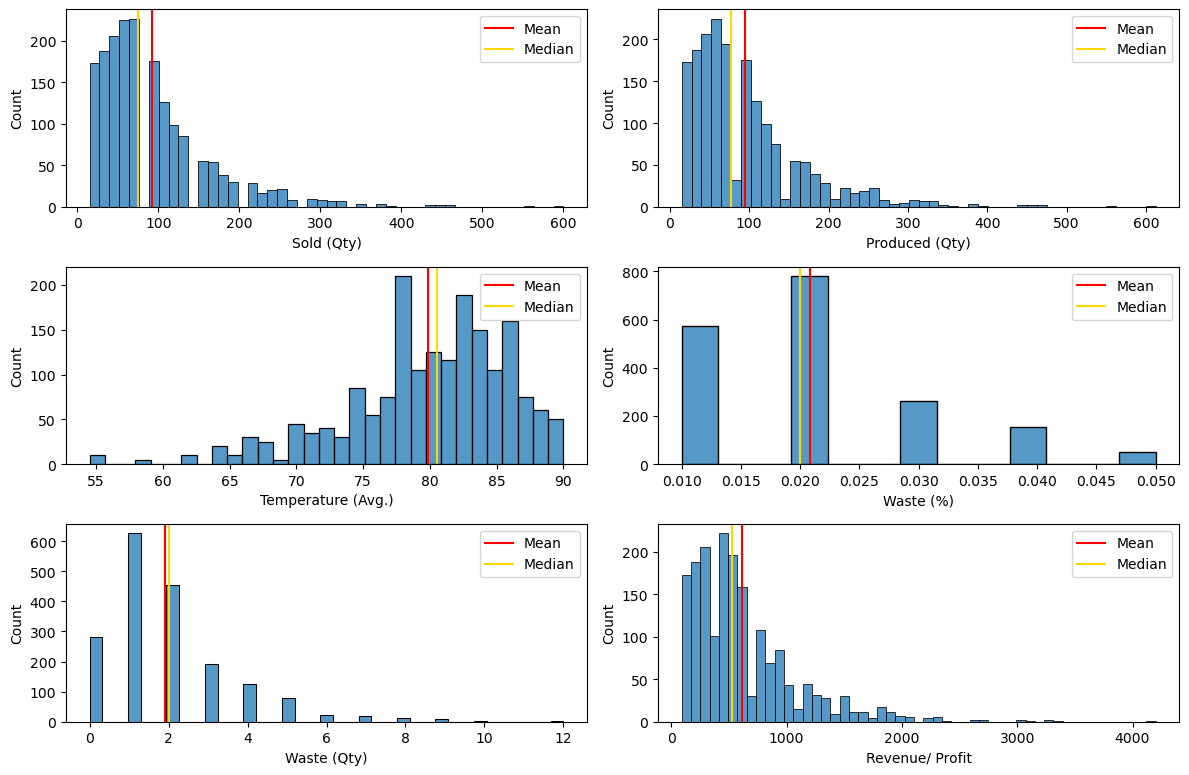

In [9]:
# Set up grid of subplots
plt.subplots(3, 3, figsize=(12, 10))

#Initialize count
plot_num=1

#Loop through column names in the list 
for col in num_cols:
    # Save column values, mean, and median to variables
    mean = slice_data[col].mean()
    median = slice_data[col].median()

    # Plot a histogram of song tempo, with lines marking mean and median
    plt.subplot(4,2,plot_num)
    sns.histplot(slice_data, x= col)
    plt.axvline(mean, color='r', label='Mean')
    plt.axvline(median, color='gold',label='Median')
    plt.legend()

    plot_num+=1

plt.tight_layout()

plt.show()  

Looking at the visualizations above we can see the following: 

- We see some gaps within the distribution of slices sold. In terms of the quantity produced, average temperature, and revenue/ profit we are able to see some highs and lows within the distribution  This may indicate trends within the amount of slices sold. These patterns might indicate some trends within the columns.  **This is something that should be investigated further in terms of how it changes through time**.
      
- Most of the distributions show some level of skewness. 

- It looks like the most common waste percentage is around 2%.

- It looks like on most cases we have wasted 1 slice. 

- Another thing to point out is that there seems to be outliers on most of these variableswith the exception of the waste percentage. 

### Categorical Columns

Now, we want to look into our categorical columns. We can start by using the **.value_counts()** method which shows how many diferent categories we have and their frequencies.

In [10]:
slice_data['Flavor '].value_counts()

Pepperoni      365
Cheese         365
Vegetariana    365
Primavera      365
Napolitana     365
Name: Flavor , dtype: int64

In [11]:
slice_data['Rain?'].value_counts()

0    925
1    900
Name: Rain?, dtype: int64

Now we want to visally look at these numbers in a bar plot. 

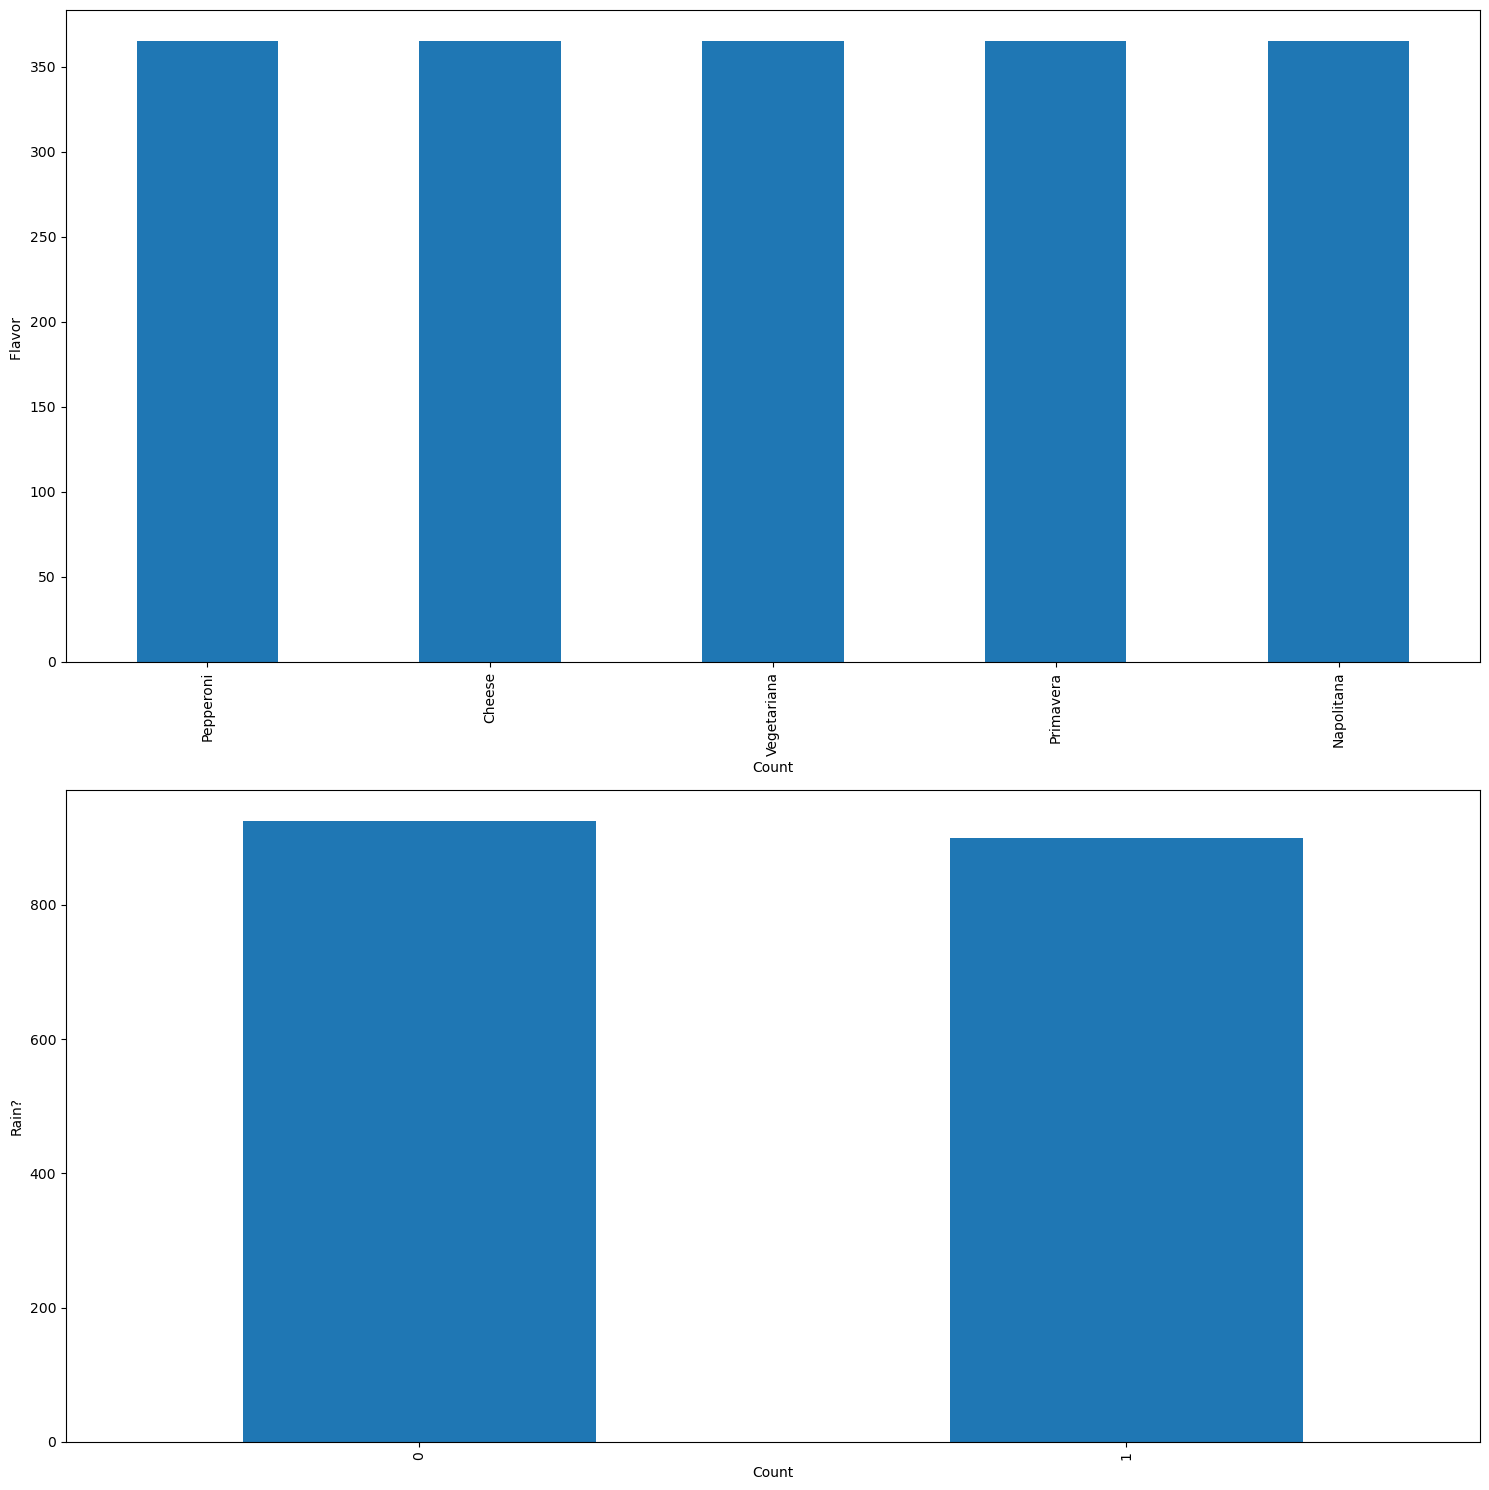

In [12]:
plt.subplots(2, 1, figsize=(15, 15))

for i,col in enumerate(cat_cols):
    plt.subplot(2,1, i+1) # i is used as the index for the grid 

    # Leveraging pandas plotting with plt syntax
    slice_data[col].value_counts().plot(kind='bar')
    plt.ylabel(f'{col}')
    plt.xlabel('Count')

plt.tight_layout()
plt.show()

From the values above we can see the following: 

- There are five different flavors that are equally distributed as shown by the value counts and the plots above. 
- There is a slight difference between **Rain?** = 0 and **Rain?** = 1 as shown by the value counts and the plot. It looks like it didn't rain for most of the year. 

## Multivariate Analysis

After looking into each column individually, we want to see the relationship each column has to our dependent variable or our target variable.

### Slices Produced vs Other Columns

In [13]:
# Save possible predictive column names to list and dependent variable to its own variable
x_options= num_cols.drop('Produced (Qty)')
y = slice_data['Produced (Qty)']

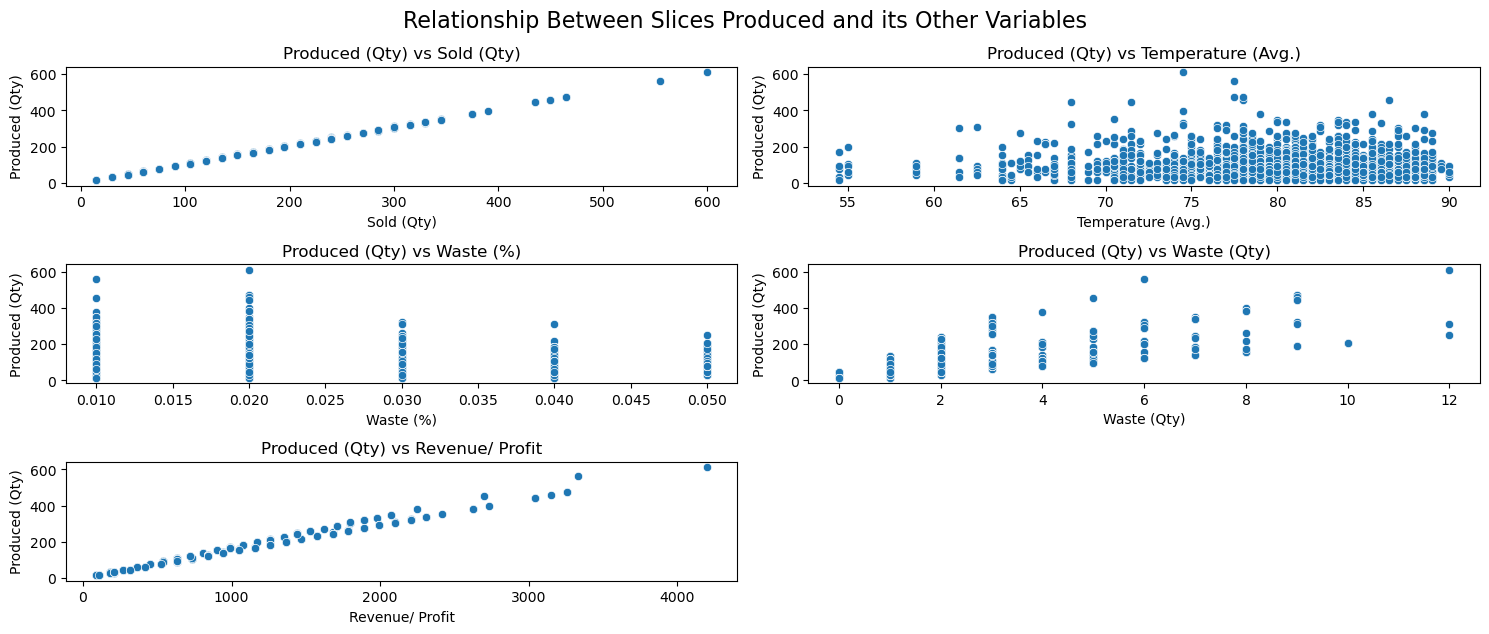

In [14]:
# Set up a grid of subplots with 4 rows and 2 columns
fig, axes = plt.subplots(4, 2, figsize=(15, 8))

plot_num = 1

# Set the main title for all subplots
plt.suptitle("Relationship Between Slices Produced and its Other Variables", fontsize=16)

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Looping over all columns
for i, col in enumerate(x_options):
    # Create a subplot and plot the scatterplot
    sns.scatterplot(slice_data, x=col, y=y, alpha=1, ax=axes[i])
    axes[i].set_title(f'Produced (Qty) vs {col}')
    plot_num += 1

# Remove any remaining empty subplots
for j in range(plot_num-1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.show()


From the plots above we can see the following: 

- It is clear that there is no relationship between the quantity produced and the waste percentage. 
- There seems to be a some correlation between how many slices were produced and how many were wasted. 
- There seems to be a perfect or almost perfect correlation between slices produced and the revenue as well as the slices sold
- It looks like there is no relationship between how many slices were sold and the average temperature. 

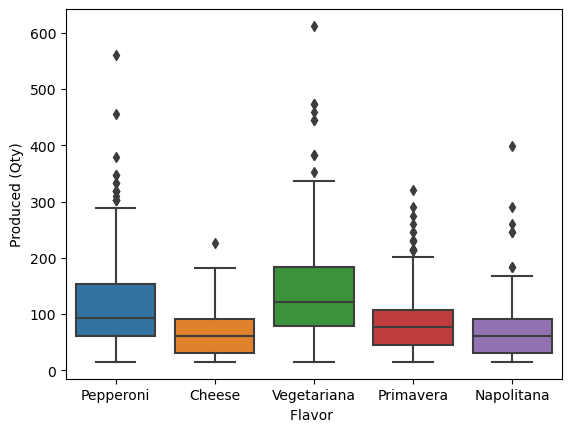

In [15]:
plt.figure()

sns.boxplot(slice_data, x='Flavor ', y='Produced (Qty)')

plt.show()

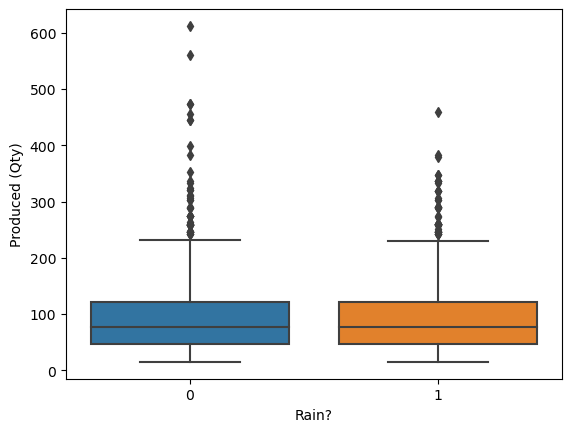

In [16]:
plt.figure()

sns.boxplot(slice_data, x='Rain?', y='Produced (Qty)')

plt.show()

From the plots above we can see the following: 

- The flavors with most produced slices are Peperoni and Vegetariana. 
- The flavors with the least produced slices is Cheese. 
- In both plots, we have outliers for flavors and whether it rained or not in terms of produced quantity. 
- One thing that stands out is that the most slices were produced when it doesn't rain. **This is something that should be explored in terms of how these quantities vary over time depending on if it rained or not**.

## Statistical Techniques

Now, we want to take a deeper look into our data by using statistical techniques to evaluate the relationships within our columns. 

In [39]:
corr = slice_data.corr(numeric_only=True)
corr

,Sold (Qty),Produced (Qty),Temperature (Avg.),Rain?,Waste (%),Waste (Qty),Revenue/ Profit
Sold (Qty),1.000000,0.999881,-0.037051,-0.026105,-0.054843,0.759129,0.992780
Produced (Qty),0.999881,1.000000,-0.037904,-0.026330,-0.042232,0.769089,0.993652
Temperature (Avg.),-0.037051,-0.037904,1.000000,0.304888,-0.013392,-0.064306,-0.038780
Rain?,-0.026105,-0.026330,0.304888,1.000000,-0.009523,-0.029404,-0.027698
Waste (%),-0.054843,-0.042232,-0.013392,-0.009523,1.000000,0.489775,-0.006497
Waste (Qty),0.759129,0.769089,-0.064306,-0.029404,0.489775,1.000000,0.795407
Revenue/ Profit,0.992780,0.993652,-0.038780,-0.027698,-0.006497,0.795407,1.000000


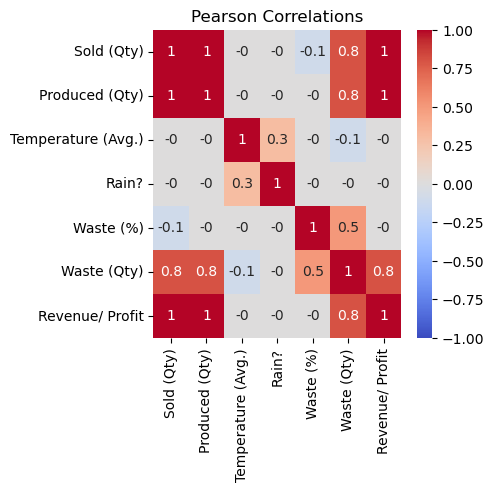

In [47]:
corr = slice_data.corr(numeric_only=True)

# making the plot
plt.figure(figsize = (4, 4))
sns.heatmap(corr.round(1), annot = True, cmap= "coolwarm", vmin= -1, vmax= 1)
plt.title("Pearson Correlations")
plt.show()

From the pearson correlations above we can see: 

- There is a strong and positive correlation betwewen slices sold, produced, waste and profit. 
- There is is a slight negative correlation between **Rain?** column and the **Temperature (Avg.)** column. 
- Slices wasted has a weak negative correlation with Temperature. 
- There doesnt seem to be any correlation between the **Rain?** column and the rest of the columns. 

Future: 
- Some food for thought in terms of how this project can be taken to another level would be looking at the amount of rain instead and see how that correlation value changes. 

In [53]:
from scipy.stats import ttest_ind

rain_0 = slice_data[slice_data['Rain?'] == 0]['Produced (Qty)']
rain_1 = slice_data[slice_data['Rain?'] == 1]['Produced (Qty)']

t_stat, p_value = ttest_ind(rain_0, rain_1)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.124581336776623, P-value: 0.2609145351229512


The T-test above allows us to evalaute even further the relationship between whether ir rained or not and the slices produced. From the values above we see that we have a p-value above the standard threshold of 0.05. This indicates that we can accept the **null hypothesis** which is that **there is no association between the columns**. This coincides with the pearson correlation value observed in the tables and visualization above which showed a correlation closer to 0. 

In [18]:
from scipy.stats import chi2_contingency # importing Chi Squared Test

contingency_table = pd.crosstab(slice_data['Flavor '], slice_data['Produced (Qty)'])

chi2, p, dof, ex = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}, p-value: {p}") 

Chi-square statistic: 2050.7631103239846, p-value: 1.5007600639111616e-232


The Chi Test above allows us evaluate the relationship between the columns **Flavor** and **Produced (Qty)**. From the values produced, we are able to see that there is a strong relationship between the columns through the statistic value. In terms of the the p-value, we have a value that is below the standard threshold of 0.05. This indicates that we can reject the **null hypothesis** which is that **there is no association between the columns**. 

## Time Series Analysis 

Now, we want to look into how some of our columns vary over time. To do so, we will use the **.resample()** method to resample our daily records to monthly data, summing up the day-by-day values to get a single monthly total.

In [20]:
# the "MS" option specifies Monthly frequency by Start day
slice_data_monthly = slice_data.resample("MS").sum(numeric_only=True)

slice_data_monthly.head()

,Sold (Qty),Produced (Qty),Temperature (Avg.),Rain?,Waste (%),Waste (Qty),Revenue/ Profit
Date,,,,,,,
2023-01-01,13710,14007,11180.0,0,3.26,297,91050
2023-02-01,13455,13744,10620.0,20,2.92,289,89220
2023-03-01,19830,20243,11907.5,50,3.23,413,131595
2023-04-01,14310,14608,11901.5,90,3.12,298,94050
2023-05-01,12405,12672,12585.0,85,3.28,267,81960


### Sold (Qty)

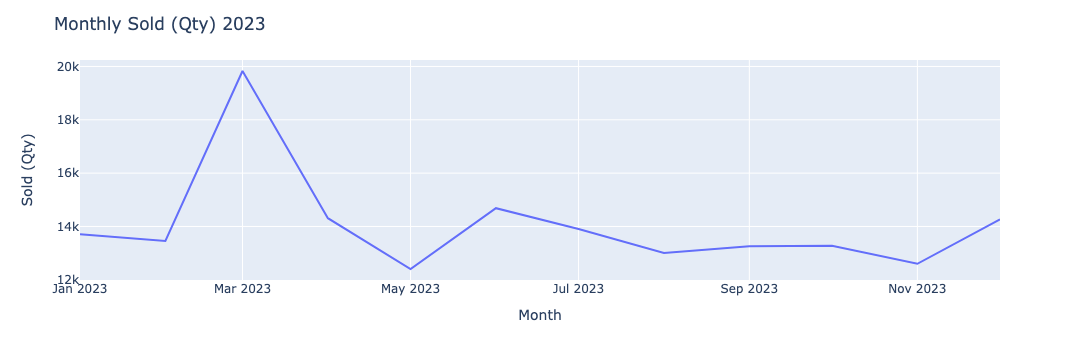

In [26]:
fig = px.line(slice_data_monthly, x=slice_data_monthly.index, y="Sold (Qty)")
fig.update_layout(
    yaxis_title="Sold (Qty)", 
    xaxis_title="Month",
    title="Monthly Sold (Qty) 2023"
)
fig.show()

### Produced (Qty)

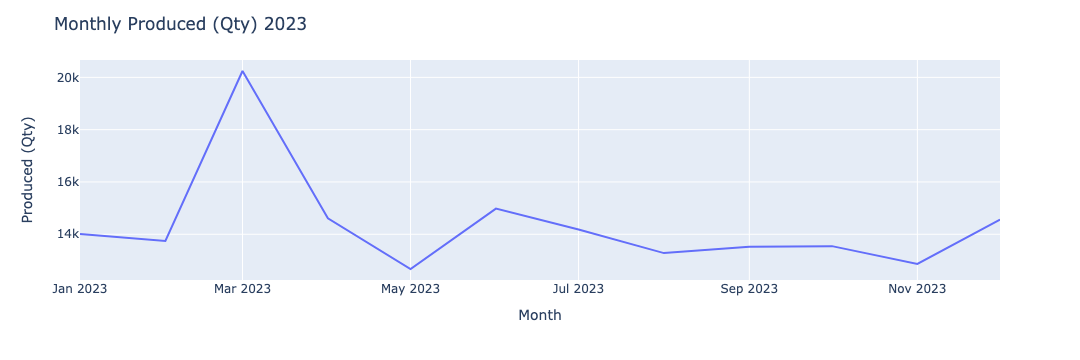

In [27]:
fig = px.line(slice_data_monthly, x=slice_data_monthly.index, y="Produced (Qty)")
fig.update_layout(
    yaxis_title="Produced (Qty)", 
    xaxis_title="Month",
    title="Monthly Produced (Qty) 2023"
)
fig.show()

### Temperature (Avg.)

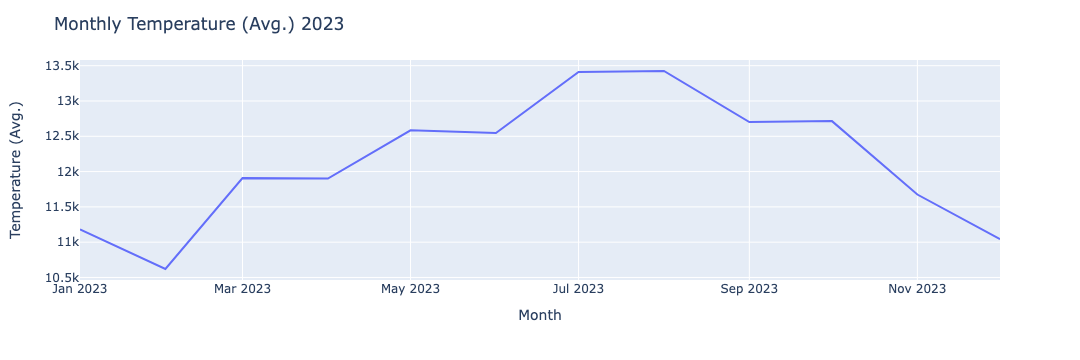

In [28]:
fig = px.line(slice_data_monthly, x=slice_data_monthly.index, y="Temperature (Avg.)")
fig.update_layout(
    yaxis_title="Temperature (Avg.)", 
    xaxis_title="Month",
    title="Monthly Temperature (Avg.) 2023"
)
fig.show()

### Rain?

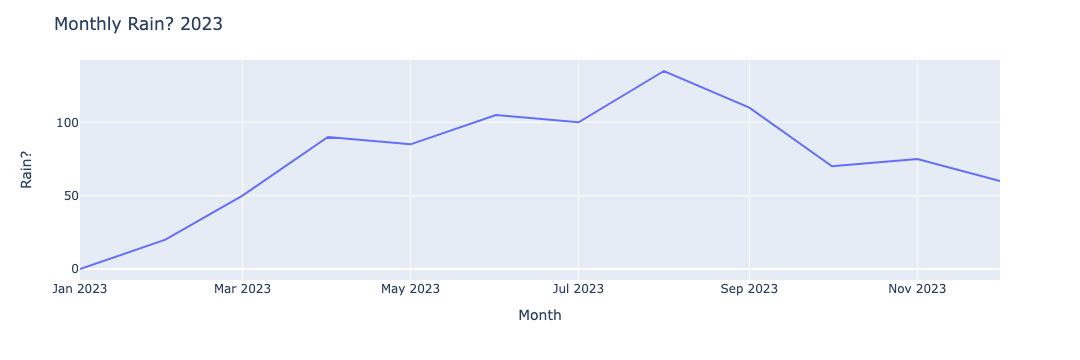

In [29]:
fig = px.line(slice_data_monthly, x=slice_data_monthly.index, y="Rain?")
fig.update_layout(
    yaxis_title="Rain?", 
    xaxis_title="Month",
    title="Monthly Rain? 2023"
)
fig.show()

### Waste (%)

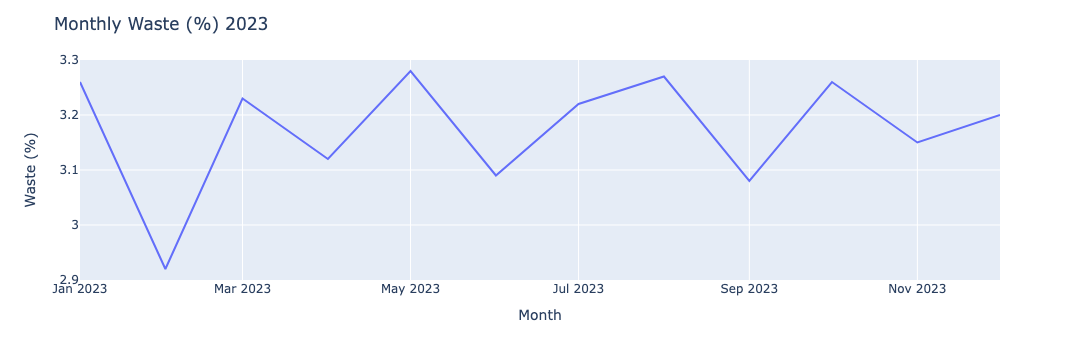

In [30]:
fig = px.line(slice_data_monthly, x=slice_data_monthly.index, y="Waste (%)")
fig.update_layout(
    yaxis_title="Waste (%)", 
    xaxis_title="Month",
    title="Monthly Waste (%) 2023"
)
fig.show()

### Waste (Qty)

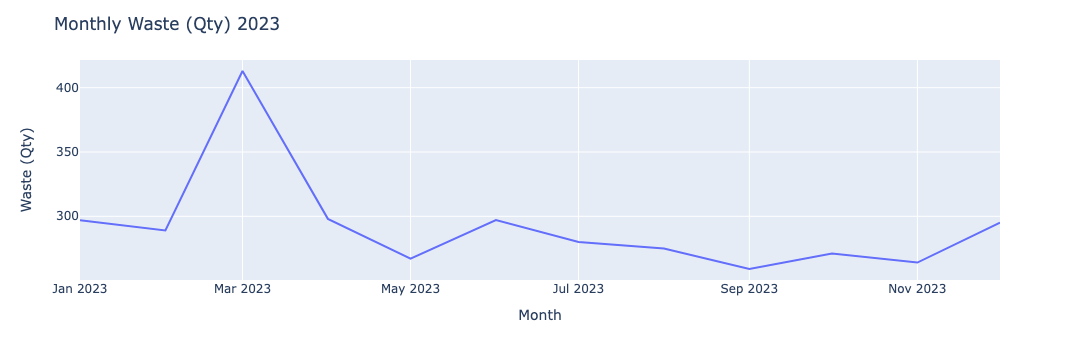

In [32]:
fig = px.line(slice_data_monthly, x=slice_data_monthly.index, y="Waste (Qty)")
fig.update_layout(
    yaxis_title="Waste (Qty)", 
    xaxis_title="Month",
    title="Monthly Waste (Qty) 2023"
)
fig.show()

### Revenue/ Profit

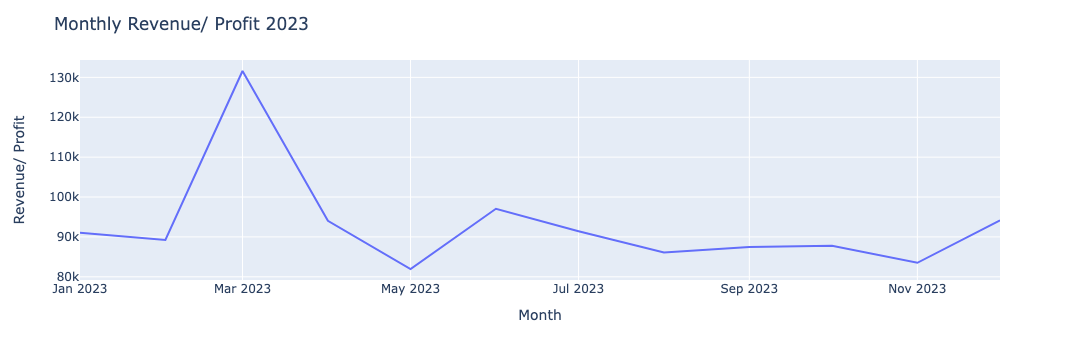

In [33]:
fig = px.line(slice_data_monthly, x=slice_data_monthly.index, y="Revenue/ Profit")
fig.update_layout(
    yaxis_title="Revenue/ Profit", 
    xaxis_title="Month",
    title="Monthly Revenue/ Profit 2023"
)
fig.show()

From the graphs above: 

-  We see that there  are changes on a month to month basis showing a little bit of a seasonality trend within the columns. 
- The highest temperatures are in the summer from June up unitl September and the lowest temperatures are observed in January. 
- In terms of **Rain?** we observe that August is when it rained the most. 
- In terms of **Waste (%)** we see that the lowest percentage is in February and the highest is May.
- The problem is highlighted through the graphs of the columns: **Sold (Qty)**, **Waste (Qty)** and **Produced (Qty)**. This is because we would like to see.

Next Steps: 
**Preprocessing Data**